This file to do Cleaning, tidying and visualizations techniquies on the country data set 

In [1]:
# M1 -> Cleaning, tidying and visualizations
# M2 -> Feature Engineering and pipeline
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(rc={'figure.figsize':(7,7)})
from sklearn import preprocessing

Reading Data

In [2]:
country_data_df = pd.read_csv('Data/250 Country Data.csv')
country_data_df

,Unnamed: 0,name,region,subregion,population,area,gini,Real Growth Rating(%),Literacy Rate(%),Inflation(%),Unemployement(%)
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,27.8,3.1% (2013 est.).,28.1% (2000 est.),6.8% (2013 est.).,35% (2008 est.).
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,NaN,NaN,NaN,NaN,NaN
2,2,Albania,Europe,Southern Europe,2886026,28748.0,34.5,.7% (2013 est.).,98.7% (2011 est.),1.7% (2013 est.).,16.9% official rate (2013 est.). Note: These a...
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,35.3,3.1%.,79%,3.9%.,10.3%.
4,4,American Samoa,Oceania,Polynesia,57100,199.0,NaN,3%.,97% (1980 est.),NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
245,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,NaN,NaN,NaN,NaN,NaN
246,246,Western Sahara,Africa,Northern Africa,510713,266000.0,NaN,NaN,NaN,NaN,NaN
247,247,Yemen,Asia,Western Asia,27478000,527968.0,37.7,3.8%.,65.3% (2011 est.),11.8%.,35% (2003 est.).
248,248,Zambia,Africa,Eastern Africa,15933883,752612.0,54.6,6%.,61.4% (2007 est.),7.1%.,15% (2008 est.).


Since our research questions doesn't need any of these attruibute "gini,Real Growth Rating(%),Literacy Rate(%), Inflation(%),Unemployement(%)" 
We will drop them
and any country doesn't have population isn't in our scoop

In [3]:
country_data_df= country_data_df.drop(["gini","Real Growth Rating(%)","Literacy Rate(%)","Inflation(%)","Unemployement(%)"], axis=1)
country_data_df =  country_data_df[country_data_df['population'] != 0]


Counting the number of nulls in the data set

Unnamed: 0     0
name           0
region         0
subregion      1
population     0
area          10
dtype: int64

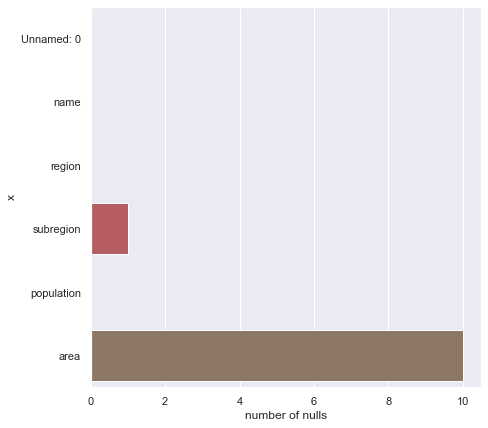

In [4]:
null_count=country_data_df.isnull().sum()
df_null_count = pd.DataFrame({'x':country_data_df.columns, 'number of nulls':null_count.values})
sns.barplot(x = 'number of nulls',
            y = 'x',
            data = df_null_count)
null_count

In [5]:
null_count=country_data_df.isnull()
country_data_df2 =  country_data_df[null_count['subregion'] == True]
country_data_df2

,Unnamed: 0,name,region,subregion,population,area
8,8,Antarctica,Polar,NaN,1000,14000000.0


since the only null value in subregion makes sense, will duplicate the value in region to it

In [6]:
country_data_df['subregion'].replace(np.nan, "Polar", inplace=True)

In [7]:
null_count=country_data_df.isnull()
country_data_df2 =  country_data_df[null_count['area'] == True]
country_data_df2

,Unnamed: 0,name,region,subregion,population,area
33,33,United States Minor Outlying Islands,Americas,Northern America,300,NaN
78,78,French Guiana,Americas,South America,254541,NaN
90,90,Guadeloupe,Americas,Caribbean,400132,NaN
140,140,Martinique,Americas,Caribbean,378243,NaN
143,143,Mayotte,Africa,Eastern Africa,226915,NaN
171,171,"Palestine, State of",Asia,Western Asia,4682467,NaN
183,183,Réunion,Africa,Eastern Africa,840974,NaN
188,188,"Saint Helena, Ascension and Tristan da Cunha",Africa,Western Africa,4255,NaN
209,209,South Georgia and the South Sandwich Islands,Americas,South America,30,NaN
216,216,Svalbard and Jan Mayen,Europe,Northern Europe,2562,NaN


after observing the nulls in area, we find it's for small regions and since they are only 4% from the dataset we dropped it

In [8]:
country_data_df2 =  country_data_df[country_data_df['population'] < country_data_df.population.mean()/4]
country_data_df2 = country_data_df.sort_values(by=['area'])
country_data_df2['area_index'] = range(0, len(country_data_df2))
country_data_df =  country_data_df2[country_data_df2['area_index'] <= len(country_data_df2)*0.95]
country_data_df.drop(["area_index"], axis=1)
country_data_df = country_data_df.sort_index()
country_data_df

,Unnamed: 0,name,region,subregion,population,area,area_index
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0,196
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0,58
2,2,Albania,Europe,Southern Europe,2886026,28748.0,94
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0,227
4,4,American Samoa,Oceania,Polynesia,57100,199.0,26
...,...,...,...,...,...,...,...
245,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0,21
246,246,Western Sahara,Africa,Northern Africa,510713,266000.0,159
247,247,Yemen,Asia,Western Asia,27478000,527968.0,187
248,248,Zambia,Africa,Eastern Africa,15933883,752612.0,198


In [9]:
country_data_df =country_data_df.drop(["area_index"], axis=1)
country_data_df = country_data_df.sort_index()
country_data_df.index= range(0,len(country_data_df.index))
country_data_df

,Unnamed: 0,name,region,subregion,population,area
0,0,Afghanistan,Asia,Southern Asia,27657145,652230.0
1,1,Åland Islands,Europe,Northern Europe,28875,1580.0
2,2,Albania,Europe,Southern Europe,2886026,28748.0
3,3,Algeria,Africa,Northern Africa,40400000,2381741.0
4,4,American Samoa,Oceania,Polynesia,57100,199.0
...,...,...,...,...,...,...
231,245,Wallis and Futuna,Oceania,Polynesia,11750,142.0
232,246,Western Sahara,Africa,Northern Africa,510713,266000.0
233,247,Yemen,Asia,Western Asia,27478000,527968.0
234,248,Zambia,Africa,Eastern Africa,15933883,752612.0


# Exporting the data

In [11]:
root_path='Cleaned_data/'
country_data_df.to_csv(root_path+'250 Country Data.csv')